In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch, time
import numpy as np
from first_gm import SM_World, plot_SM, plot_raster, gaussian_kernel, tensor2spikeship

## Raster plot generative model with a superposition of SMs
### Parameters

In [3]:
class world_params:
    N_pre = 200 # number of neurons in the RP
    N_delays = 51 # number of timesteps in the SM (must be a odd number for convolutions)
    N_kernels = 5 # number of SM used for RP generation
    
    p_input = .1 # probability of having spike for the input
    SM_ratio = 10 # coefficient that gives the SM/noise spike ratio
    N_timesteps =  2**10 # number of timesteps in the RP
    
    p_spontaneous = p_input/(1+SM_ratio) # probability of the spontaneous activity
    
    # TODO define all this better to work only with probability values
    avg_N_spikes = N_delays*N_pre*p_spontaneous # average number of spikes per SM
    std_N_spikes = 1 # variance for the number of spikes per SM
    
    #p_sm = p_input*SM_ratio/(1+SM_ratio)
    p_output = p_input*SM_ratio/((1+SM_ratio)*avg_N_spikes)
    
    avg_precision = 10 # average precision for the spikes in the SM (inverse of variance of the gaussian distribution defined for 1 spike)
    std_precision = 1 # variance for the precision
    
    seed = 4815162342 # seed

TODO: change something in the formula with SM_ratio

### Generative model without motif non overlapping

In [4]:
start_time = time.time()

In [5]:
N_trials = 10
opt = world_params()
world = SM_World(opt)
input_rp, output_rp = world.draw_input(N_trials = N_trials, sm_overlapping = False)
spike_times, ii_spike_times = tensor2spikeship(input_rp)

In [6]:
print(f'-- {time.time()-start_time} seconds -- For {N_trials} epochs and {opt.N_pre} neurons.')

-- 0.3872194290161133 seconds -- For 10 epochs and 200 neurons.


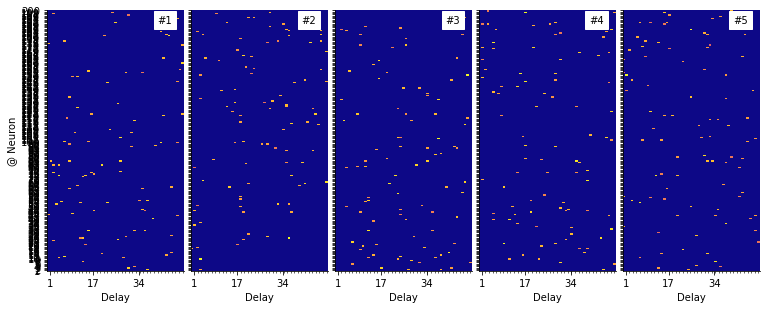

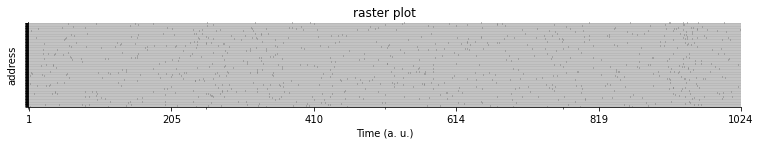

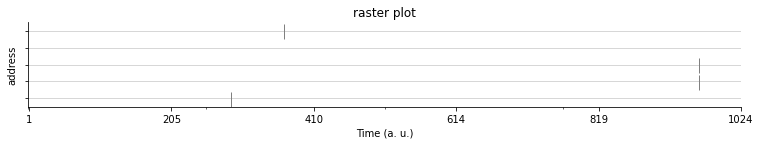

In [7]:
plot_SM(world.kernels, N_show = opt.N_kernels, figsize = (12, 5));
plot_raster(input_rp, colored=False);
plot_raster(output_rp, colored=False);

### Check with 2000 neurons and 100 epochs

In [8]:
start_time = time.time()
N_trials = 100
opt = world_params()
opt.N_pre = 2000
world = SM_World(opt)
input_rp, output_rp = world.draw_input(N_trials = N_trials, sm_overlapping = False)
spike_times, ii_spike_times = tensor2spikeship(input_rp)
print(f'-- {time.time()-start_time} seconds -- For {N_trials} epochs and {opt.N_pre} neurons.')

-- 2251.3107743263245 seconds -- For 100 epochs and 4000 neurons.
